### This file is associated with my research project testing the hypothesis that prescriptive power of non-physician is associated with more opioid prescriptions. 
### I use raw arcos dataset provided by washington post. This data follows each painkiller pill in the years 2006-2012 across all states in the USA.
### As expected, it is a massive dataset of 17GB (or 17 million kB) I have downloaded and saved on my PC, and as such I will not be able to process it using my RAM. I could use the arcos API provided by wapo to perform the same task, but in my experience their server was always to busy to even perform simple tasks.
### My goal in this file is to use the panel data I created using the raw file and a few other sources, for testing for regression discontinuity at the state-level. 

Steps in this analysis:
1. Use panel.csv file to make a dataframe (df) with months and state as indices.
1. Make regression discontinuity graphs: opioid quantities sold per month in a state, standardized by state population estimates, vs. ref. time of different treatments

(c) Arsh Singh, Dec 2022

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file='panel.csv'
folder='D:/arcos_all_washpost/'
path=folder+file
panel=pd.read_csv(path)
panel

,ID,STATE,months,year,hydrocodone,oxycodone,both,pop,hydrocodone_per_cap,oxycodone_per_cap,both_per_cap,np,np_no_md,pa,any
0,AZ24115,AZ,24115,2009,27877975.0,2.534856e+07,5.322653e+07,6343154,4.394971,3.996207,8.391178,1,1,1,1
1,AZ24110,AZ,24110,2009,24619375.0,2.153884e+07,4.615822e+07,6343154,3.881251,3.395604,7.276855,1,1,1,1
2,AZ24118,AZ,24118,2009,26808600.0,2.697941e+07,5.378801e+07,6343154,4.226383,4.253311,8.479694,1,1,1,1
3,AZ24117,AZ,24117,2009,26459075.0,2.562547e+07,5.208455e+07,6343154,4.171281,4.039863,8.211144,1,1,1,1
4,AZ24116,AZ,24116,2009,25195600.0,2.387104e+07,4.906664e+07,6343154,3.972093,3.763276,7.735369,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,KS24126,KS,24126,2010,10750.0,1.000000e+03,1.175000e+04,2858190,0.003761,0.000350,0.004111,1,0,1,1
2800,KS24120,KS,24120,2010,7750.0,1.500000e+03,9.250000e+03,2858190,0.002712,0.000525,0.003236,1,0,1,1
2801,KS24129,KS,24129,2010,9000.0,1.000000e+03,1.000000e+04,2858190,0.003149,0.000350,0.003499,1,0,1,1
2802,KS24125,KS,24125,2010,13000.0,6.500000e+03,1.950000e+04,2858190,0.004548,0.002274,0.006822,1,0,1,1


In [3]:
# year of passing of law
np_dict={'STATE':['LA','KY','VA','HI'],'np_year':[2006,2007,2007,2009]}

In [4]:
np_df=pd.DataFrame.from_dict(np_dict)
np_df['np_months']=np_df['np_year']*12+12 
            # +12 assuming law gets enforced beginning of next year
np_df=np_df.drop(columns=['np_year'])
np_df

,STATE,np_months
0,LA,24084
1,KY,24096
2,VA,24096
3,HI,24120


In [5]:
np_no_md_dict={'STATE':['AZ','CO','HI','ID','MI','RI','WA','WY','CA','SC'],
              'year':[2006,2010,2005,2005,2005,2009,2006,2006,2007,2006]}
np_no_md_df=pd.DataFrame.from_dict(np_no_md_dict)
np_no_md_df['np_no_md_months']=np_no_md_df['year']*12+12 
            # +12 assuming law gets enforced beginning of next year
np_no_md_df=np_no_md_df.drop(columns=['year'])
np_no_md_df

,STATE,np_no_md_months
0,AZ,24084
1,CO,24132
2,HI,24072
3,ID,24072
4,MI,24072
5,RI,24120
6,WA,24084
7,WY,24084
8,CA,24096
9,SC,24084


In [6]:
pa_dict={'STATE':['PA','VA','DC','NY','IL'],
         'year':[2007,2007,2007,2008,2010]}
pa_df=pd.DataFrame.from_dict(pa_dict)
pa_df['pa_months']=pa_df['year']*12+12
        # +12 assuming law gets enforced beginning of next year
pa_df=pa_df.drop(columns=['year'])   
pa_df

,STATE,pa_months
0,PA,24096
1,VA,24096
2,DC,24096
3,NY,24108
4,IL,24132


In [7]:
panel1=pd.merge(panel,np_df,on='STATE',how='left')
panel2=pd.merge(panel1,np_no_md_df,on='STATE',how='left')
panel3=pd.merge(panel2,pa_df,on='STATE',how='left')
panel3.head()

,ID,STATE,months,year,hydrocodone,oxycodone,both,pop,hydrocodone_per_cap,oxycodone_per_cap,both_per_cap,np,np_no_md,pa,any,np_months,np_no_md_months,pa_months
0,AZ24115,AZ,24115,2009,27877975.0,2.534856e+07,5.322653e+07,6343154,4.394971,3.996207,8.391178,1,1,1,1,NaN,24084.0,NaN
1,AZ24110,AZ,24110,2009,24619375.0,2.153884e+07,4.615822e+07,6343154,3.881251,3.395604,7.276855,1,1,1,1,NaN,24084.0,NaN
2,AZ24118,AZ,24118,2009,26808600.0,2.697941e+07,5.378801e+07,6343154,4.226383,4.253311,8.479694,1,1,1,1,NaN,24084.0,NaN
3,AZ24117,AZ,24117,2009,26459075.0,2.562547e+07,5.208455e+07,6343154,4.171281,4.039863,8.211144,1,1,1,1,NaN,24084.0,NaN
4,AZ24116,AZ,24116,2009,25195600.0,2.387104e+07,4.906664e+07,6343154,3.972093,3.763276,7.735369,1,1,1,1,NaN,24084.0,NaN


In [8]:
panel3['months_ref_np']=panel3['months']-panel3['np_months']
panel3['months_ref_np_no_md']=panel3['months']-panel3['np_no_md_months']
panel3['months_ref_pa']=panel3['months']-panel3['pa_months']
panel_temp=panel3[panel3['STATE']!='VA']

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


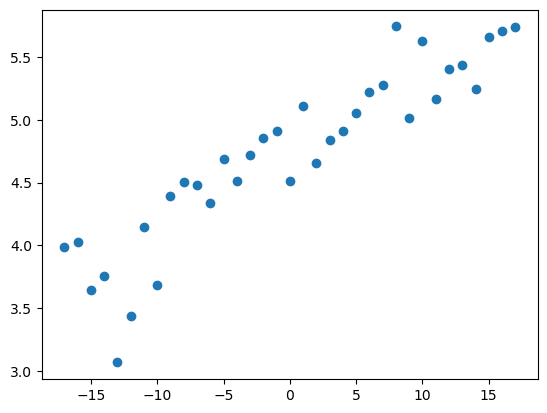

In [27]:
panel_temp[['STATE','hydrocodone_per_cap','hydrocodone','oxycodone_per_cap','oxycodone','both_per_cap','both','months_ref_np']].dropna()
panel_np=panel_temp.groupby('months_ref_np').mean()
panel_np['months_ref_np']=panel_np.index
panel_np2=panel_np[(panel_np['months_ref_np']<18)][(panel_np['months_ref_np']>-18)]
plt.scatter(panel_np2['months_ref_np'],panel_np2['both_per_cap'])

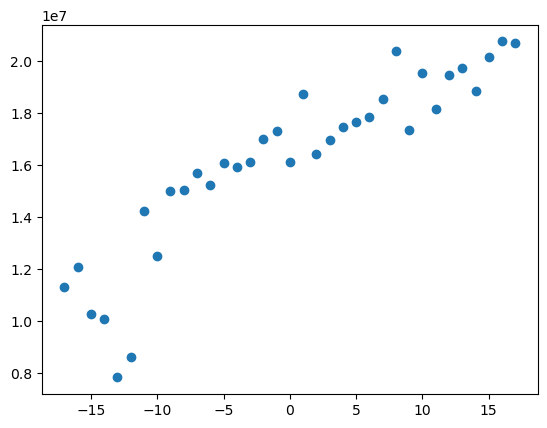

In [28]:
plt.scatter(panel_np2['months_ref_np'],panel_np2['both'])

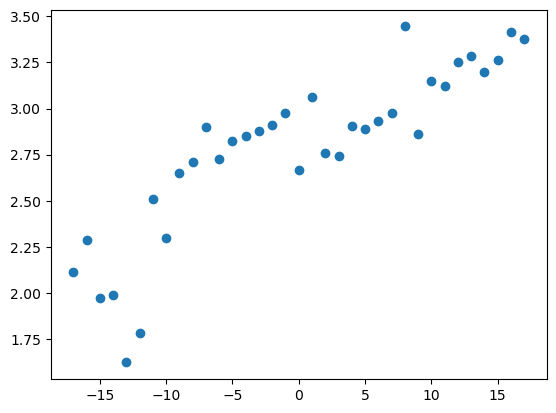

In [10]:
plt.scatter(panel_np2['months_ref_np'],panel_np2['hydrocodone_per_cap'])

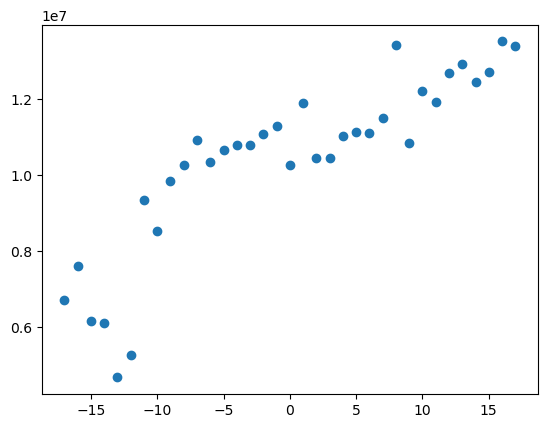

In [29]:
plt.scatter(panel_np2['months_ref_np'],panel_np2['hydrocodone'])

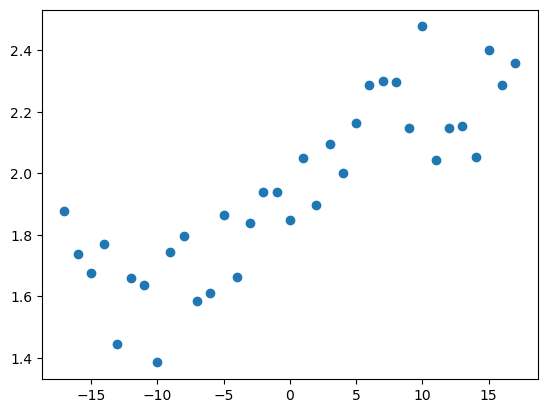

In [11]:
plt.scatter(panel_np2['months_ref_np'],panel_np2['oxycodone_per_cap'])

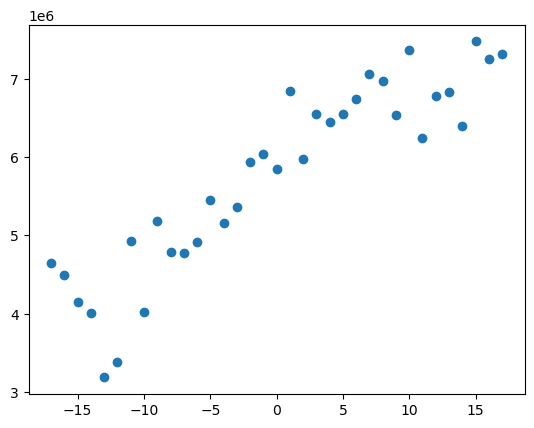

In [30]:
plt.scatter(panel_np2['months_ref_np'],panel_np2['oxycodone'])

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


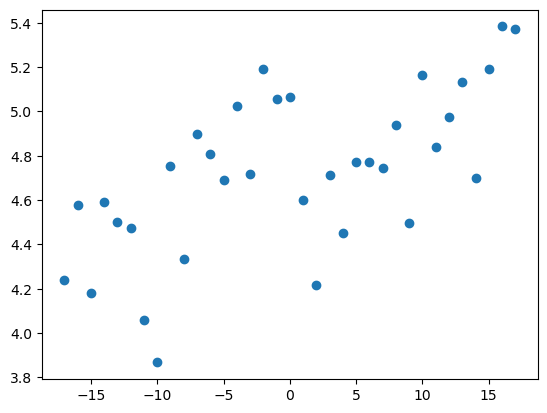

In [22]:
panel_temp[['STATE','hydrocodone_per_cap','oxycodone_per_cap','both_per_cap','months_ref_np_no_md']].dropna()
panel_np_no_md=panel_temp.groupby('months_ref_np_no_md').mean()
panel_np_no_md['months_ref_np_no_md']=panel_np_no_md.index
panel_np_no_md2=panel_np_no_md[panel_np_no_md['months_ref_np_no_md']<18][panel_np_no_md['months_ref_np_no_md']>-18]
#panel_np_no_md2=panel_np_no_md.copy()
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['both_per_cap'])

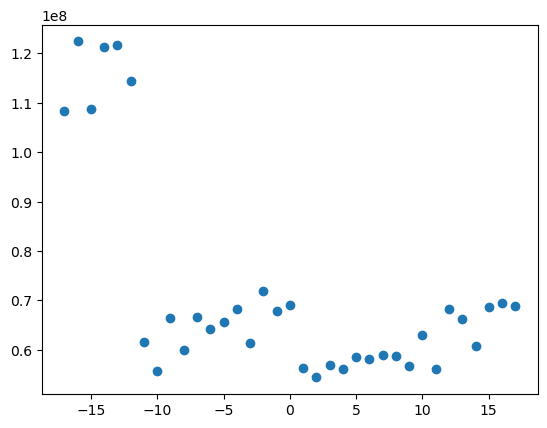

In [31]:
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['both'])

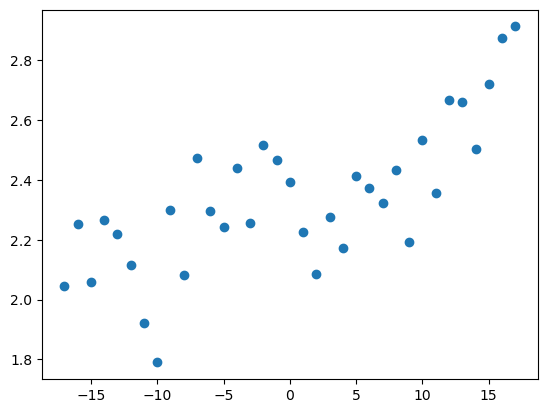

In [23]:
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['hydrocodone_per_cap'])

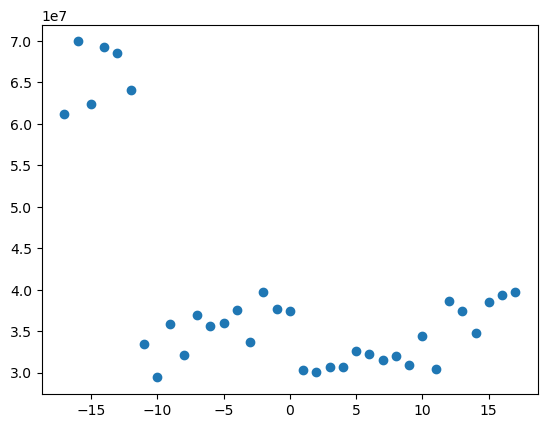

In [32]:
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['hydrocodone'])

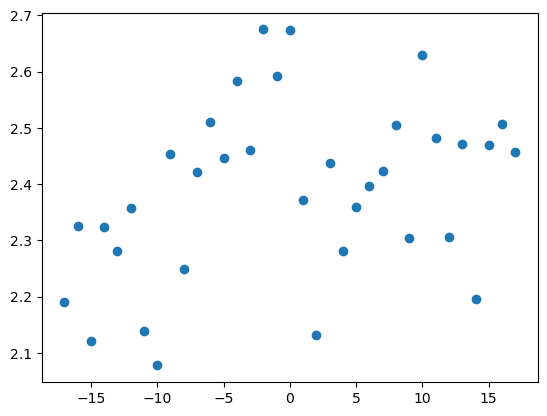

In [24]:
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['oxycodone_per_cap'])

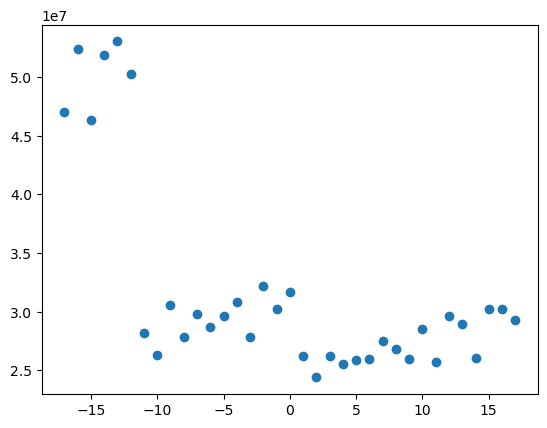

In [33]:
plt.scatter(panel_np_no_md2['months_ref_np_no_md'],panel_np_no_md2['oxycodone'])

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


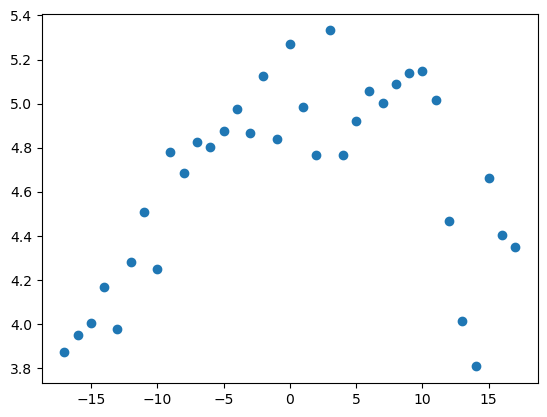

In [25]:
panel_temp[['STATE','hydrocodone_per_cap','oxycodone_per_cap','both_per_cap','months_ref_pa']].dropna()
panel_pa=panel_temp.groupby('months_ref_pa').mean()
panel_pa['months_ref_pa']=panel_pa.index
panel_pa2=panel_pa[panel_pa['months_ref_pa']<18][panel_pa['months_ref_pa']>-18]
#panel_pa2=panel_pa.copy()
panel_pa2
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['both_per_cap'])

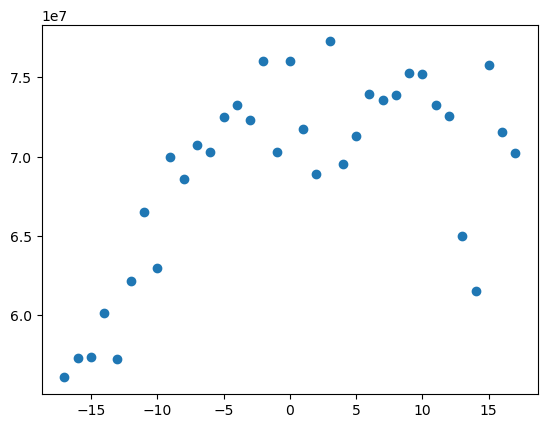

In [34]:
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['both'])

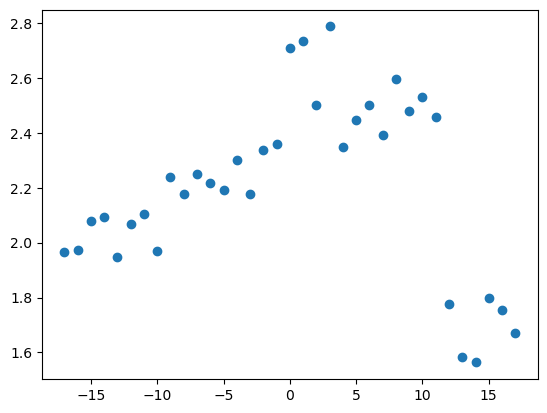

In [26]:
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['hydrocodone_per_cap'])

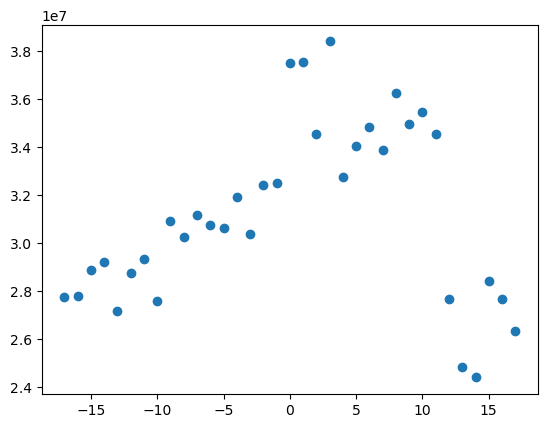

In [35]:
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['hydrocodone'])

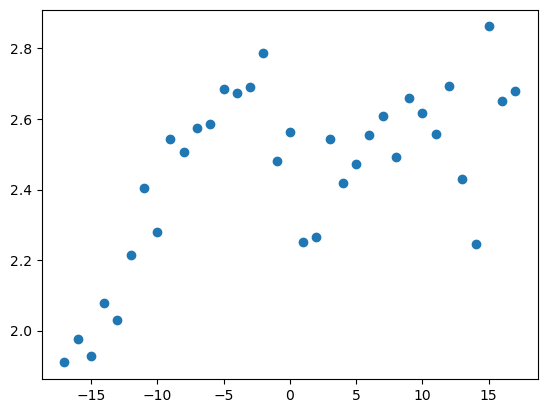

In [21]:
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['oxycodone_per_cap'])

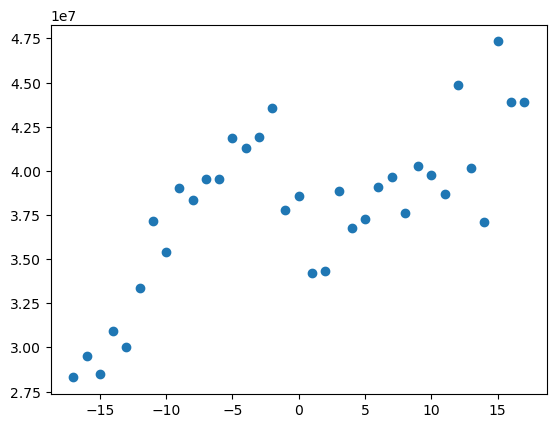

In [36]:
plt.scatter(panel_pa2['months_ref_pa'],panel_pa2['oxycodone'])